<Figure size 432x288 with 0 Axes>

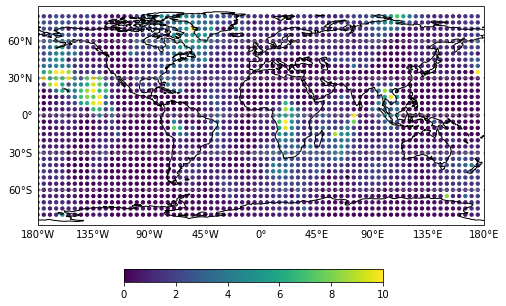

In [1]:
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 2

# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
Nsample = 100

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_{1:d}M_20yr.results".format(jerk_number+1,Nsample)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

# make plot of the max probability of a jerks over a window of t0 +/- 25 years

y_theta, y_phi, y_delta = [],[],[]

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9][10]  # this is the element that spans the event
    
    
    y_theta.append(theta)
    y_phi.append(phi)
# normalise by average value at location:
# exclude the end bins as they don't lie in the time window [-200, 200].
    y_delta.append ( delta /np.mean(results[j][9][1:len(results[j][9])-1] ))
    
cmap = plt.get_cmap('viridis')
plt.figure()

f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() }) 
#y_delta = np.array(y_delta)
marker_size = 11. 

 
cax = axes.scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_delta,cmap=cmap, vmin=0, vmax=10)
gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
              linewidth=2, color='gray', alpha=0.5, linestyle='--')

axes.coastlines()

gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cb_ax = f.add_axes([0.20, 0.31, 0.6, 0.1])
#cb_ax.scatter([0,1,2,3],[0,1,2,3],[0,1,2,4])
cbar = f.colorbar(cax, ax=cb_ax, orientation = 'horizontal')
cb_ax.set_axis_off()


outfname = 'Jerk_delta_map_'+str(jerk_number+1)+ '_5x5_'+str(Nsample)+'M'
f.savefig(outfname + '.pdf',bbox_inches = 'tight')

np.savetxt('jerk_finder_event' + str(jerk_number+1) + '_' + str(Nsample)+'M.txt',np.vstack((y_theta, y_phi, y_delta)).T, fmt='%d %d %.4f')


In [95]:
results[j][9][1:len(results[j][9])-1]


array([3.15313176, 0.1683474 , 2.96776034, 0.33510447, 0.72899042,
       0.12247349, 1.16765116, 0.04047125, 0.02415242, 3.99576072,
       4.66163633, 1.80068361, 4.33355314, 4.73854227, 3.70336778,
       5.22274491, 2.02257525, 2.16607465, 1.12517333])

In [96]:
results[j][9]

array([0.0334322 , 3.15313176, 0.1683474 , 2.96776034, 0.33510447,
       0.72899042, 0.12247349, 1.16765116, 0.04047125, 0.02415242,
       3.99576072, 4.66163633, 1.80068361, 4.33355314, 4.73854227,
       3.70336778, 5.22274491, 2.02257525, 2.16607465, 1.12517333,
       0.43184957])

Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]
1402


<Figure size 432x288 with 0 Axes>

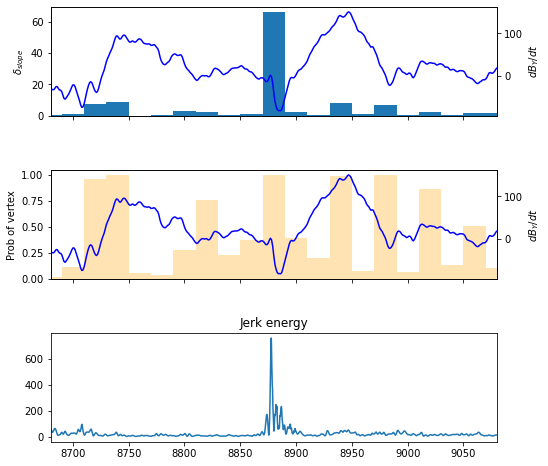

In [6]:
# Plot jerk at a specific location

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_50M_20yr.results".format(jerk_number+1)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure


        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
time_intervals_nbins = len(time_intervals_edges)-1
plt.figure()
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), sharex=True)

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9]
    CP = results[j][8]
    
    
    if(theta==90 and phi == 30):
        #theta=90
        #phi=80
        Br, Btheta, Bphi = cp.model_utils.synth_values(coeffs, radius, theta, phi,nmax=13)
        Br_yearly,Btheta_yearly, Bphi_yearly = np.interp(time_yearly, time, Br ), np.interp(time_yearly, time, Btheta ), np.interp(time_yearly, time, Bphi )
        Bx_dot, By_dot, Bz_dot = -np.gradient(Btheta_yearly,time_yearly), np.gradient(Bphi_yearly,time_yearly), -np.gradient(Br_yearly,time_yearly)
        left_edges = time_intervals_edges[0:time_intervals_nbins]
        print(j)
    
        if component == 1:
            ax1.bar(left_edges, delta, align='edge', width=time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins])
            ax1.set_xlim(time_yearly.min(), time_yearly.max() )
            ax1.set_ylabel(r'$\delta_{slope}$')
            ax5 = ax1.twinx()
            ax5.plot(TIMES,By_dot,'b')
            ax5.set_ylabel(r'$d{B_Y}/dt$')
            #ax1.set_title(r'$d{B_Y}/dt$')
            
            ax2.bar(left_edges, CP, align='edge', width = 1*(left_edges[1] - left_edges[0]),color='orange',alpha=0.3)
            ax2.set_ylabel('Prob of vertex')

            ax6 = ax2.twinx()
            ax6.plot(TIMES,By_dot,'b')
            ax6.set_ylabel(r'$d{B_Y}/dt$')

        time_EJ, EJ = np.loadtxt('../Jerk_energy.dat',unpack=True)
        ax3.plot(time_EJ, EJ )

        ax3.set_xlim(time_yearly.min(), time_yearly.max()  )
        ax3.set_title('Jerk energy')


        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

        outfname = 'Jerk'+str(jerk_number+1)+'_ts_theta'+str(theta)+'_phi'+str(phi)
        #plt.savefig(outfname+'.pdf')
        plt.savefig(outfname+'.png')


In [3]:
# Find extreme values of delta:

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_100M_20yr.results".format(jerk_number+1)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure


        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
time_intervals_nbins = len(time_intervals_edges)-1


for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9]
    CP = results[j][8]
    
    if(max(delta) > 500):
        print( theta, phi, delta[10], max(delta)) 
    


Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]
100.0 -135.0 3.667646472649999 631.4122127399586
145.0 -100.0 0.6469465059862597 698.1069485797259
85.0 -20.0 5417.19622625223 5417.19622625223
90.0 -5.0 12.449879470541537 574.302048440142
80.0 20.0 577.1977550765332 577.1977550765332
155.0 30.0 4.044037611191333 622.6479193619488
115.0 65.0 773.1853961163273 773.1853961163273
90.0 75.0 319.13567437280176 751.3170192305649
25.0 100.0 1.1421203839594027 734.5527529875897
70.0 110.0 7.023064851209762 2167.2520128700276
20.0 130.0 3.7923572174804496 682.5119750998879
130.0 130.0 9.248575466056863 872.4296325037725


Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]
1400


<Figure size 432x288 with 0 Axes>

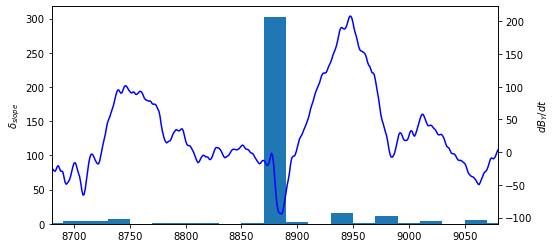

In [6]:
# Plot single observatory in simple figure

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_100M_20yr.results".format(jerk_number+1)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure


        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
time_intervals_nbins = len(time_intervals_edges)-1
plt.figure()
f, ax1 = plt.subplots(1, 1, figsize=(8,4) )

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9]
    CP = results[j][8]
    
    
    if(theta==80 and phi == 30):
        #theta=90
        #phi=80
        Br, Btheta, Bphi = cp.model_utils.synth_values(coeffs, radius, theta, phi,nmax=13)
        Br_yearly,Btheta_yearly, Bphi_yearly = np.interp(time_yearly, time, Br ), np.interp(time_yearly, time, Btheta ), np.interp(time_yearly, time, Bphi )
        Bx_dot, By_dot, Bz_dot = -np.gradient(Btheta_yearly,time_yearly), np.gradient(Bphi_yearly,time_yearly), -np.gradient(Br_yearly,time_yearly)
        left_edges = time_intervals_edges[0:time_intervals_nbins]
        print(j)
    
        if component == 1:
            ax1.bar(left_edges, delta, align='edge', width=time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins])
            ax1.set_xlim(time_yearly.min(), time_yearly.max() )
            ax1.set_ylabel(r'$\delta_{slope}$')
            ax5 = ax1.twinx()
            ax5.plot(TIMES,By_dot,'b')
            ax5.set_ylabel(r'$d{B_Y}/dt$')
            #ax1.set_title(r'$d{B_Y}/dt$')
            
    


        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
        outfname = 'Jerk'+str(jerk_number+1)+'_ts_theta'+str(theta)+'_phi'+str(phi)+'simple'
        plt.savefig(outfname+'.png')
        


Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]
1402


<Figure size 432x288 with 0 Axes>

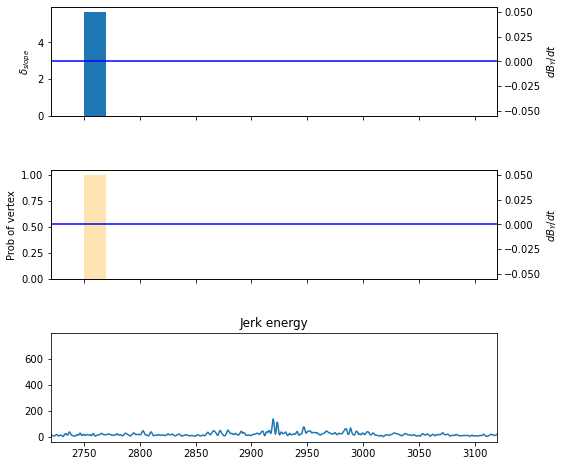

In [21]:
# Plot jerk 3

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 2 

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_50M_20yr.results".format(jerk_number+1)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure


        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
time_intervals_nbins = len(time_intervals_edges)-1
plt.figure()
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), sharex=True)

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9]
    CP = results[j][8]
    
    
    if(theta==90 and phi == 30):
        #theta=90
        #phi=80
        Br, Btheta, Bphi = cp.model_utils.synth_values(coeffs, radius, theta, phi,nmax=13)
        Br_yearly,Btheta_yearly, Bphi_yearly = np.interp(time_yearly, time, Br ), np.interp(time_yearly, time, Btheta ), np.interp(time_yearly, time, Bphi )
        Bx_dot, By_dot, Bz_dot = -np.gradient(Btheta_yearly,time_yearly), np.gradient(Bphi_yearly,time_yearly), -np.gradient(Br_yearly,time_yearly)
        left_edges = time_intervals_edges[0:time_intervals_nbins]
        print(j)
    
        if component == 1:
            ax1.bar(left_edges, delta, align='edge', width=time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins])
            ax1.set_xlim(time_yearly.min(), time_yearly.max() )
            ax1.set_ylabel(r'$\delta_{slope}$')
            ax5 = ax1.twinx()
            ax5.plot(TIMES,By_dot,'b')
            ax5.set_ylabel(r'$d{B_Y}/dt$')
            #ax1.set_title(r'$d{B_Y}/dt$')
            
            ax2.bar(left_edges, CP, align='edge', width = 1*(left_edges[1] - left_edges[0]),color='orange',alpha=0.3)
            ax2.set_ylabel('Prob of vertex')

            ax6 = ax2.twinx()
            ax6.plot(TIMES,By_dot,'b')
            ax6.set_ylabel(r'$d{B_Y}/dt$')

        time_EJ, EJ = np.loadtxt('../Jerk_energy.dat',unpack=True)
        ax3.plot(time_EJ, EJ )

        ax3.set_xlim(time_yearly.min(), time_yearly.max()  )
        ax3.set_title('Jerk energy')


        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

        


In [82]:
# Animate time window for jerk 9
plt.close('all')
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8

# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
Nsample = 100

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_{1:d}M_20yr.results".format(jerk_number+1,Nsample)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

for l in range(0,21):
    
    y_theta, y_phi, y_delta = [],[],[]

    for j in range(len(results)):
        theta = results[j][0]
        phi = results[j][1]
        component = 1
        delta = results[j][9][l]  # this is the element that spans the event


        y_theta.append(theta)
        y_phi.append(phi)
    # normalise by average value at location:
        y_delta.append ( delta /np.mean(results[j][9] ))

    cmap = plt.get_cmap('viridis')
    plt.figure()

    f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() }) 
    #y_delta = np.array(y_delta)
    marker_size = 11. 

    axes.set_title('Time bin ' + str(time_intervals_edges[l]) + '-' + str(time_intervals_edges[l+1]))
    cax = axes.scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_delta,cmap=cmap, vmin=0, vmax=10)
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    axes.coastlines()

    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    cb_ax = f.add_axes([0.20, 0.31, 0.6, 0.1])
    #cb_ax.scatter([0,1,2,3],[0,1,2,3],[0,1,2,4])
    cbar = f.colorbar(cax, ax=cb_ax, orientation = 'horizontal')
    cb_ax.set_axis_off()


    outfname = 'Jerk_delta_map_{0:d}_5x5_{1:d}M_timeindex{2:02d}'.format(jerk_number+1, Nsample, l)
    f.savefig(outfname + '.png',bbox_inches = 'tight',dpi=400)
    plt.close()



/var/folders/0m/gg6r1njs62b484lqmt29pts42jxwv0/T/ipykernel_24162/2131930705.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() })
/var/folders/0m/gg6r1njs62b484lqmt29pts42jxwv0/T/ipykernel_24162/2131930705.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
# Animate time window for jerk 3
plt.close('all')
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 2

# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
Nsample = 100

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_{1:d}M_20yr.results".format(jerk_number+1,Nsample)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

for l in range(0,21):
    
    y_theta, y_phi, y_delta = [],[],[]

    for j in range(len(results)):
        theta = results[j][0]
        phi = results[j][1]
        component = 1
        delta = results[j][9][l]  # this is the element that spans the event


        y_theta.append(theta)
        y_phi.append(phi)
    # normalise by average value at location:
        y_delta.append ( delta /np.mean(results[j][9] ))

    cmap = plt.get_cmap('viridis')
    plt.figure()

    f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() }) 
    #y_delta = np.array(y_delta)
    marker_size = 11. 

    axes.set_title('Time bin ' + str(time_intervals_edges[l]) + '-' + str(time_intervals_edges[l+1]))
    cax = axes.scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_delta,cmap=cmap, vmin=0, vmax=10)
    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    axes.coastlines()

    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    cb_ax = f.add_axes([0.20, 0.31, 0.6, 0.1])
    #cb_ax.scatter([0,1,2,3],[0,1,2,3],[0,1,2,4])
    cbar = f.colorbar(cax, ax=cb_ax, orientation = 'horizontal')
    cb_ax.set_axis_off()


    outfname = 'Jerk_delta_map_{0:d}_5x5_{1:d}M_timeindex{2:02d}'.format(jerk_number+1, Nsample, l)
    f.savefig(outfname + '.png',bbox_inches = 'tight',dpi=400)
    plt.close()



/var/folders/0m/gg6r1njs62b484lqmt29pts42jxwv0/T/ipykernel_25714/817697785.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() })
/var/folders/0m/gg6r1njs62b484lqmt29pts42jxwv0/T/ipykernel_25714/817697785.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>